# Imports

In [1]:
import numpy as np
import scipy.io as sio
import pandas as  pd

In [2]:
import matplotlib.pyplot as plt

# DB

In [3]:
workingDir = 'C:/Cerebral/_MarioSandBox/DB/medicalHolography/vascular/Example/'
dataName = 'VTD_ready_for_ROI_choice.mat'
maskName = 'mask.mat'

In [4]:
def readData(fileLocationAndName,VariableName):
    data = sio.loadmat(fileLocationAndName)
    data = data[VariableName]
    dataArray = np.array(data)
    return dataArray

In [5]:
data = readData(workingDir+dataName,'VTD_ready')
data.shape

(360L, 766L, 760L)

In [6]:
mask = readData(workingDir+maskName,'mask')
mask.shape

(760L, 766L)

# Data Manipulation

In [7]:
def invertImages(stack):
    [slices,w,l] = np.shape(stack)
    invertedImages = np.zeros([slices,l,w])
    numSlices = np.shape(stack)[0]
    for sliceIndex in xrange(numSlices):        
        currentImage = np.fliplr(np.flipud(stack[sliceIndex].T))
        invertedImages[sliceIndex]= currentImage        
    return invertedImages    

# Visualization Functions

In [8]:
def drawSingleImage(stack):
    plt.figure()
    plt.imshow(stack)

In [9]:
def drawSlice(stack,sliceIndex):
    plt.figure()
    plt.imshow(stack[sliceIndex])

In [10]:
def sample_stack(stack, rows=6, cols=6, start_with=10, show_every=3):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='jet')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

# Mask Functions

In [11]:
def maskImageStack(stack,mask):    
    maskedImages = np.zeros(np.shape(stack))
    numSlices = np.shape(stack)[0]
    for sliceIndex in xrange(numSlices):
        currentImage = stack[sliceIndex]
        maskedImages[sliceIndex]= np.multiply(currentImage,mask)
    
    return maskedImages    

# Testing Some Application of Masks

In [12]:
newData = invertImages(data)

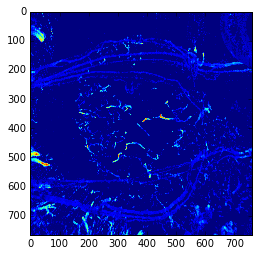

In [13]:
sliceIndex = 70
drawSlice(data,sliceIndex)

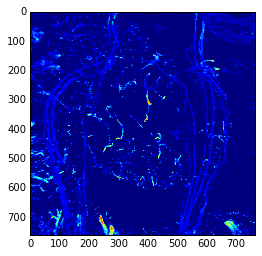

In [14]:
drawSlice(newData,sliceIndex)

This looks like the image that was provided to us in the example folder. 

Now let us apply the mask provided.

In [15]:
np.shape(newData[0])

(760L, 766L)

In [16]:
np.shape(mask)

(760L, 766L)

In [17]:
maskedImageStack = maskImageStack(newData,mask)

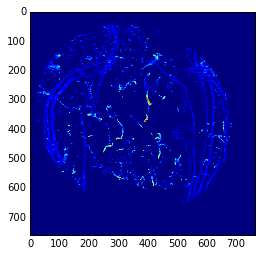

In [18]:
drawSingleImage(maskedImageStack[sliceIndex])

This also looks promising as it removes various small parts of the images.  So let us save this stack.